In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### 1. Evaluar juicios de hipótesis

FACTS:
    
* 67% x heterosexuales --> a favor
* 72% x homosexuales --> a favor

Ho: ambos porcentajes NO son diferentes
p-val = 0.1183
confianza 95%

Respuesta1: Si quisieramos fallar en contra de la hipótesis nula con un 95% de certeza, entonces el valor p debiese ser menor o igual a 0.05. En este caso, como el palor p=0.1183 > 0.05, entonces no es posible fallar en contra de la hipótesis nula.

Respuesta 2: La confianza máxima con la que sería posible rechazar la hipótesis nula es de  1 - pvalue = 1 - 0.1183 = 88.17%.

### 2. Importación de datos

In [2]:
df_initial = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col=0)

In [3]:
# creacion de dummies para las regiones (nose porque lo piden)
data = pd.get_dummies(df_initial.set_index('country')).reset_index()
data.columns = data.columns.str.replace('region_', '')

In [4]:
# seleccion columnas
columnas_NZ = ['femlab', 'literacy', 'school']
base_cols = ['country', 'region']
df = df_initial.loc[:, base_cols + columnas_NZ]

In [5]:
df.head()

,country,region,femlab,literacy,school
1,Algeria,Africa,0.4522,72.599998,6.716667
2,Benin,Africa,0.8482,41.700001,3.100000
3,Botswana,Africa,0.8870,84.099998,8.600000
4,Burkina Faso,Africa,0.8584,23.600000,1.300000
5,Burundi,Africa,1.0344,66.599998,2.483333


### 3. Función prueba hipótesis

In [6]:
def hypothesis_test(df, variable, binarize):
    tmp = df
    # separamos datos por indicador
    tmp['binarize'] = np.where(tmp['region'] == binarize, 1, 0)
    # separamos datos en variable indicada de acuerdo a 0 y 1
    values_one = tmp.query('binarize == 1')[variable].dropna()
    values_null = tmp.query('binarize == 0')[variable].dropna()
    # obtenemos estadisticas
    stats_ = stats.ttest_ind(values_one, values_null)
    print(f'Datos de {binarize} y variable {variable}')
    print()
    print(f'La media para {binarize} es {round(values_one.mean(), 3)}, y para el resto del mundo {round(values_null.mean(), 3)}')
    print(f'La diferencia entre medias es: {round(values_one.mean() - values_null.mean(), 3)}')
    print(f'Valor t: {round(stats_[0], 3)}')
    print(f'Valor p: {round(stats_[1], 3)}')
    print()
    

In [16]:
# estadisticas para cada region
for region_ in df['region'].unique():
    hypothesis_test(df, 'femlab', 'Africa')

Datos de Africa y variable femlab

La media para Africa es 0.73, y para el resto del mundo 0.676
La diferencia entre medias es: 0.054
Valor t: 1.784
Valor p: 0.076

Datos de Africa y variable femlab

La media para Africa es 0.73, y para el resto del mundo 0.676
La diferencia entre medias es: 0.054
Valor t: 1.784
Valor p: 0.076

Datos de Africa y variable femlab

La media para Africa es 0.73, y para el resto del mundo 0.676
La diferencia entre medias es: 0.054
Valor t: 1.784
Valor p: 0.076

Datos de Africa y variable femlab

La media para Africa es 0.73, y para el resto del mundo 0.676
La diferencia entre medias es: 0.054
Valor t: 1.784
Valor p: 0.076

Datos de Africa y variable femlab

La media para Africa es 0.73, y para el resto del mundo 0.676
La diferencia entre medias es: 0.054
Valor t: 1.784
Valor p: 0.076



### 4. Función histogramas

In [79]:
def hist_plot(df, variable, binarize):
    tmp = df
    # separamos datos por indicador
    tmp['binarize'] = np.where(tmp['region'] == binarize, 1, 0)
    # separamos datos en variable indicada de acuerdo a 0 y 1
    values_one = tmp.query('binarize == 1')[variable].dropna()
    values_null = tmp.query('binarize == 0')[variable].dropna()
    # graficamos
    plt.hist(values_one, alpha=.5, color='Red', label='Blue')
    plt.hist(values_null, alpha=.5, color='Blue', label='Green')    
    plt.title(f'Ocurrencias variable {variable} en región {binarize}')
    

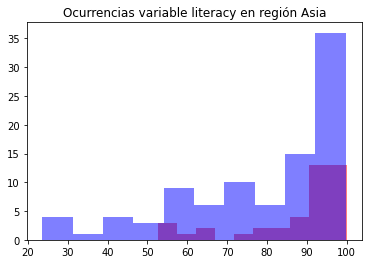

In [81]:
hist_plot(df, 'literacy', 'Asia')

Respuesta 2: No entiendo lo que se debe hacer.